# XGBoost Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import catboost

## Importing the dataset

In [2]:
dataset = pd.read_csv(r'/kaggle/input/playground-series-s3e17/train.csv')
test = pd.read_csv(r'/kaggle/input/playground-series-s3e17/test.csv')

In [3]:
dataset.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
dataset.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [5]:
dataset = dataset.reindex(columns=['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF', 'Machine failure'])

In [6]:
dataset

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [7]:
test

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


/tmp/ipykernel_20/2996877787.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


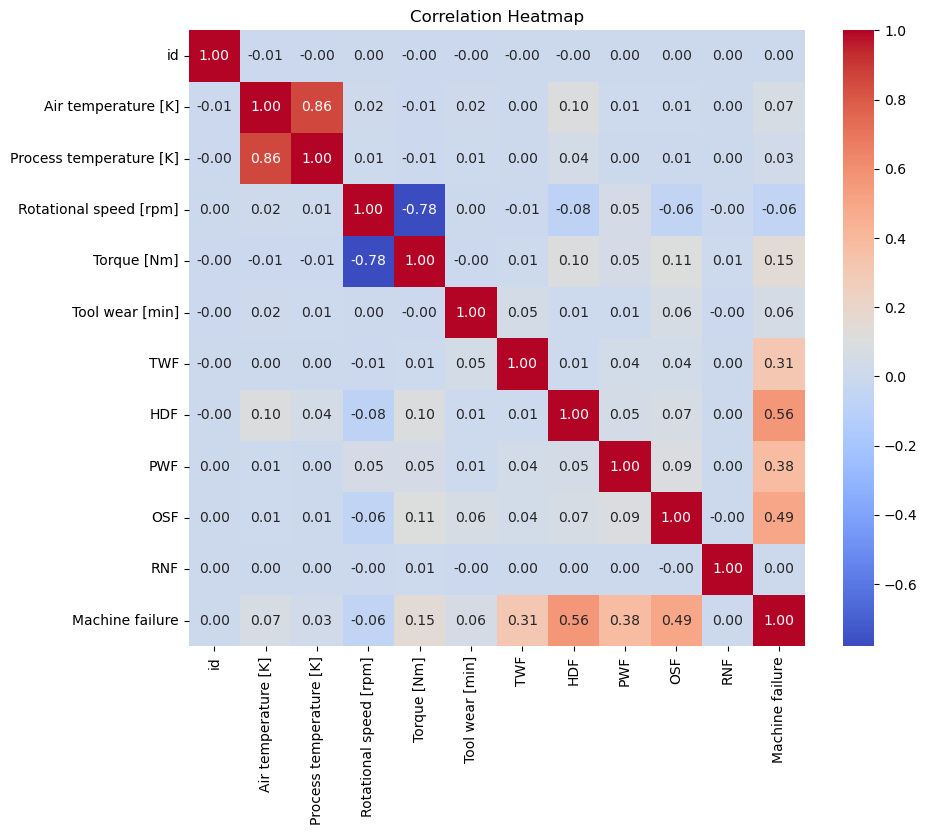

In [8]:
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame (assuming the data is already in a DataFrame)
# For demonstration purposes, let's assume the DataFrame is named 'data'
# Replace 'data' with your actual DataFrame name

# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create the correlation heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=ax)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [9]:
dataset.drop('Product ID', axis=1, inplace=True)
test.drop('Product ID', axis=1, inplace=True)
dataset.drop('id', axis=1, inplace=True)
dataset.drop('Type', axis=1, inplace=True)
test.drop('Type', axis=1, inplace=True)
dataset.drop('Air temperature [K]', axis=1, inplace=True)
test.drop('Air temperature [K]', axis=1, inplace=True)
dataset.drop('Process temperature [K]', axis=1, inplace=True)
test.drop('Process temperature [K]', axis=1, inplace=True)
dataset.drop('Rotational speed [rpm]', axis=1, inplace=True)
test.drop('Rotational speed [rpm]', axis=1, inplace=True)
dataset.drop('Tool wear [min]', axis=1, inplace=True)
test.drop('Tool wear [min]', axis=1, inplace=True)
dataset.drop('RNF', axis=1, inplace=True)
test.drop('RNF', axis=1, inplace=True)

In [10]:
dataset.head(5)

,Torque [Nm],TWF,HDF,PWF,OSF,Machine failure
0,36.1,0,0,0,0,0
1,29.1,0,0,0,0,0
2,26.5,0,0,0,0,0
3,44.3,0,0,0,0,0
4,35.4,0,0,0,0,0


In [11]:
test.head(5)

,id,Torque [Nm],TWF,HDF,PWF,OSF
0,136429,38.0,0,0,0,0
1,136430,28.8,0,0,0,0
2,136431,37.7,0,0,0,0
3,136432,47.6,0,0,0,0
4,136433,41.3,0,0,0,0


In [12]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Type']= le.fit_transform(dataset['Type'])
test['Type']= le.fit_transform(test['Type'])'''

"from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndataset['Type']= le.fit_transform(dataset['Type'])\ntest['Type']= le.fit_transform(test['Type'])"

In [13]:
test

,id,Torque [Nm],TWF,HDF,PWF,OSF
0,136429,38.0,0,0,0,0
1,136430,28.8,0,0,0,0
2,136431,37.7,0,0,0,0
3,136432,47.6,0,0,0,0
4,136433,41.3,0,0,0,0
...,...,...,...,...,...,...
90949,227378,40.4,0,0,0,0
90950,227379,33.8,0,0,0,0
90951,227380,41.4,0,0,0,0
90952,227381,40.3,0,0,0,0


In [14]:
dataset

,Torque [Nm],TWF,HDF,PWF,OSF,Machine failure
0,36.1,0,0,0,0,0
1,29.1,0,0,0,0,0
2,26.5,0,0,0,0,0
3,44.3,0,0,0,0,0
4,35.4,0,0,0,0,0
...,...,...,...,...,...,...
136424,37.5,0,0,0,0,0
136425,49.1,0,0,0,0,0
136426,38.5,0,0,0,0,0
136427,46.3,0,0,0,0,0


In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_test = test.iloc[:, 1:].values

In [16]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = under.fit_resample(X,y)

In [17]:
print(X_over)

[[36.6  0.   0.   0.   0. ]
 [41.2  0.   0.   0.   0. ]
 [42.6  0.   0.   0.   0. ]
 ...
 [49.7  0.   0.   0.   0. ]
 [62.3  0.   0.   1.   0. ]
 [49.7  0.   1.   0.   0. ]]


In [18]:
X_over.shape

(4296, 5)

In [19]:
print(y_over)

[0 0 0 ... 1 1 1]


## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_over)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[-0.71837153 -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 [-0.33785671 -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 [-0.22204785 -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 ...
 [ 0.3652685  -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 [ 1.40754823 -0.22783743 -0.44045052  3.5013225  -0.37756217]
 [ 0.3652685  -0.22783743  2.27040256 -0.28560637 -0.37756217]]


In [22]:
print(X_test)

[[-0.60256267 -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 [-1.36359232 -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 [-0.62737886 -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 ...
 [-0.32131259 -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 [-0.41230526 -0.22783743 -0.44045052 -0.28560637 -0.37756217]
 [-0.75973184 -0.22783743 -0.44045052 -0.28560637 -0.37756217]]


## Training the XGBoost Classification model on the Training set

In [23]:
from xgboost import XGBClassifier
classifier=XGBClassifier(n_estimators=975,learning_rate=0.0095,colsample_bytree = 0.8,
                             max_depth=8,min_child_weight = 20,gamma = 0.8)
classifier.fit(X_train,y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0095, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              n_estimators=975, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Predicting a new result

In [24]:
print(classifier.predict(sc.transform([[28.8,0,0,0,0]])))

[0]


In [25]:
y_pred = classifier.predict(X_test)

In [26]:
submission=pd.DataFrame({"id":test.id,"Machine failure":y_pred})
submission.to_csv('submission.csv', index=False)

In [27]:
submission.head(10)

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
5,136434,0
6,136435,0
7,136436,0
8,136437,0
9,136438,0
